In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [35]:
data = pd.read_csv('diabetes_prediction_dataset.csv')

In [36]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [37]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


## Checking Null Values

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [39]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

## Checking duplicate values...

In [40]:
 data = data.drop_duplicates()

In [41]:
data.duplicated().sum()

np.int64(0)

## Data Visualizetion

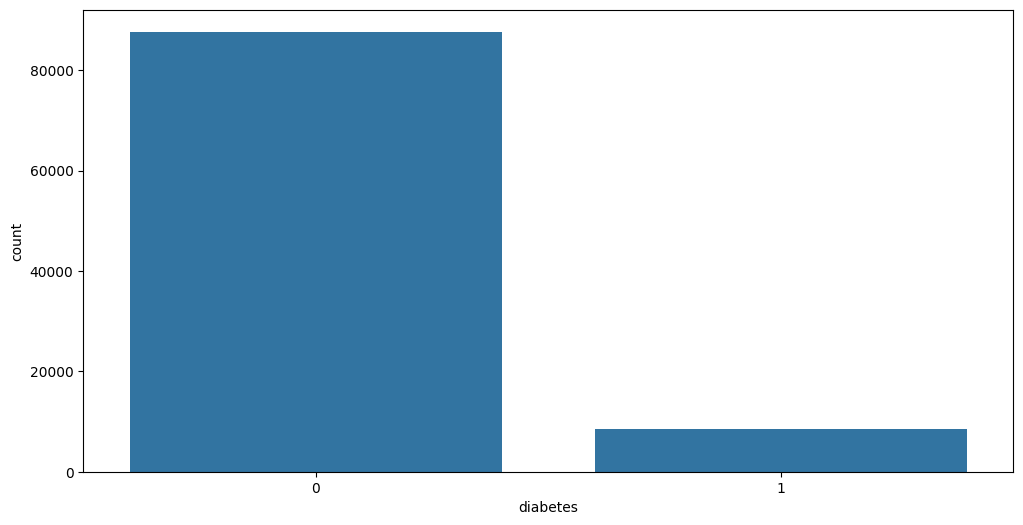

In [42]:
plt.figure(figsize=(12,6))
sns.countplot(x='diabetes',data= data)
plt.show()

## Observing Outliers

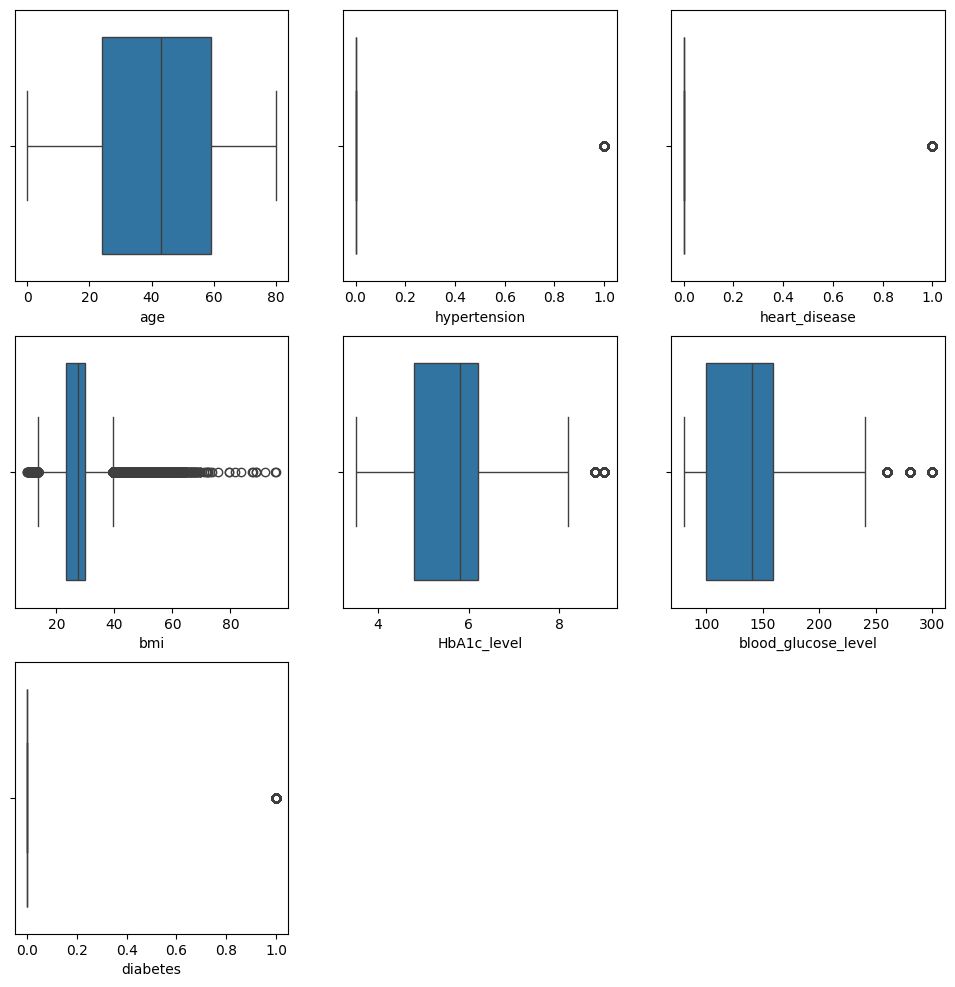

In [43]:
plt.figure(figsize=(12,12))
for i,col in enumerate(['age','hypertension','heart_disease','bmi','HbA1c_level','blood_glucose_level','diabetes']):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = col,data = data)
plt.show()

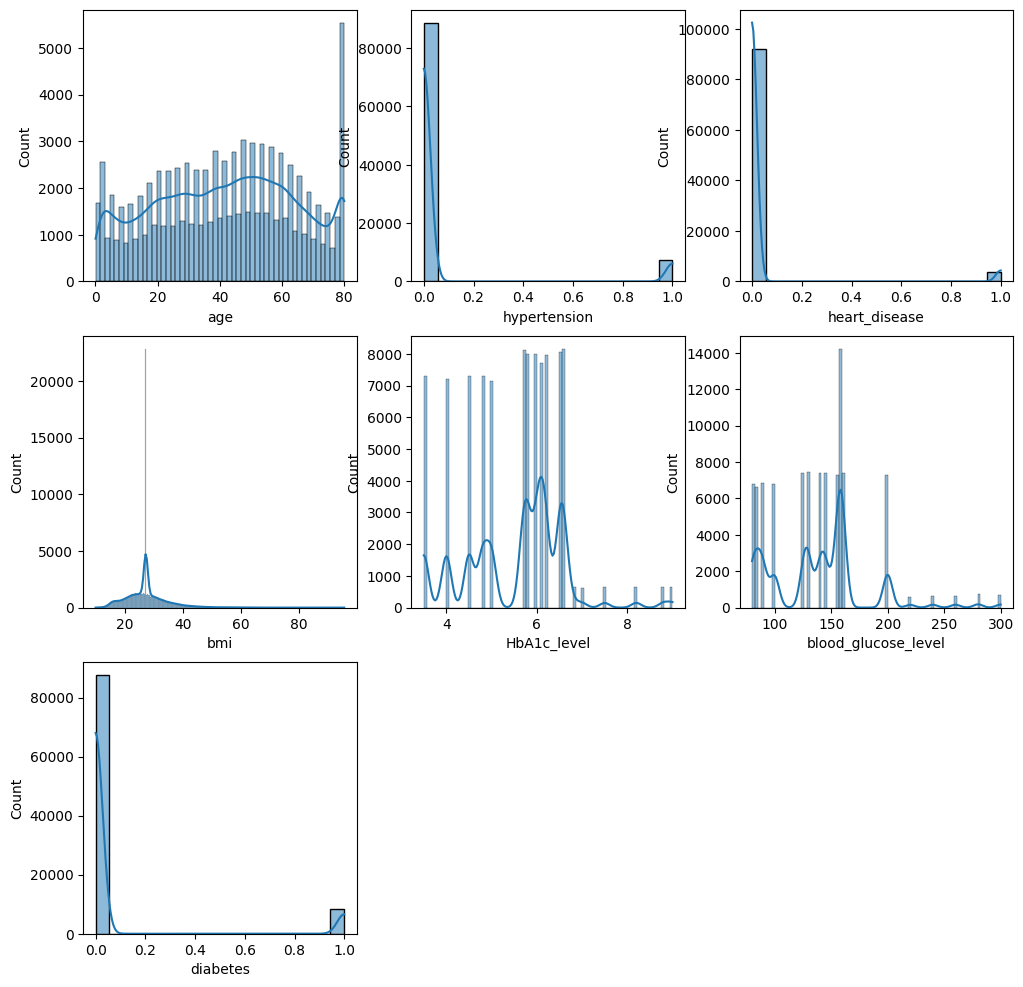

In [44]:
plt.figure(figsize=(12,12))
for i,col in enumerate(['age','hypertension','heart_disease','bmi','HbA1c_level','blood_glucose_level','diabetes']):
    plt.subplot(3,3,i+1)
    sns.histplot(x = col,data = data,kde = True)
plt.show()

## Standard Scaling and Label Encoding 

In [45]:
cat_col = [i for i in data.columns if data[i].dtypes == 'object']
from sklearn.preprocessing import LabelEncoder
for i in cat_col :
    le = LabelEncoder()
    data[i] = le.fit_transform(data[i])

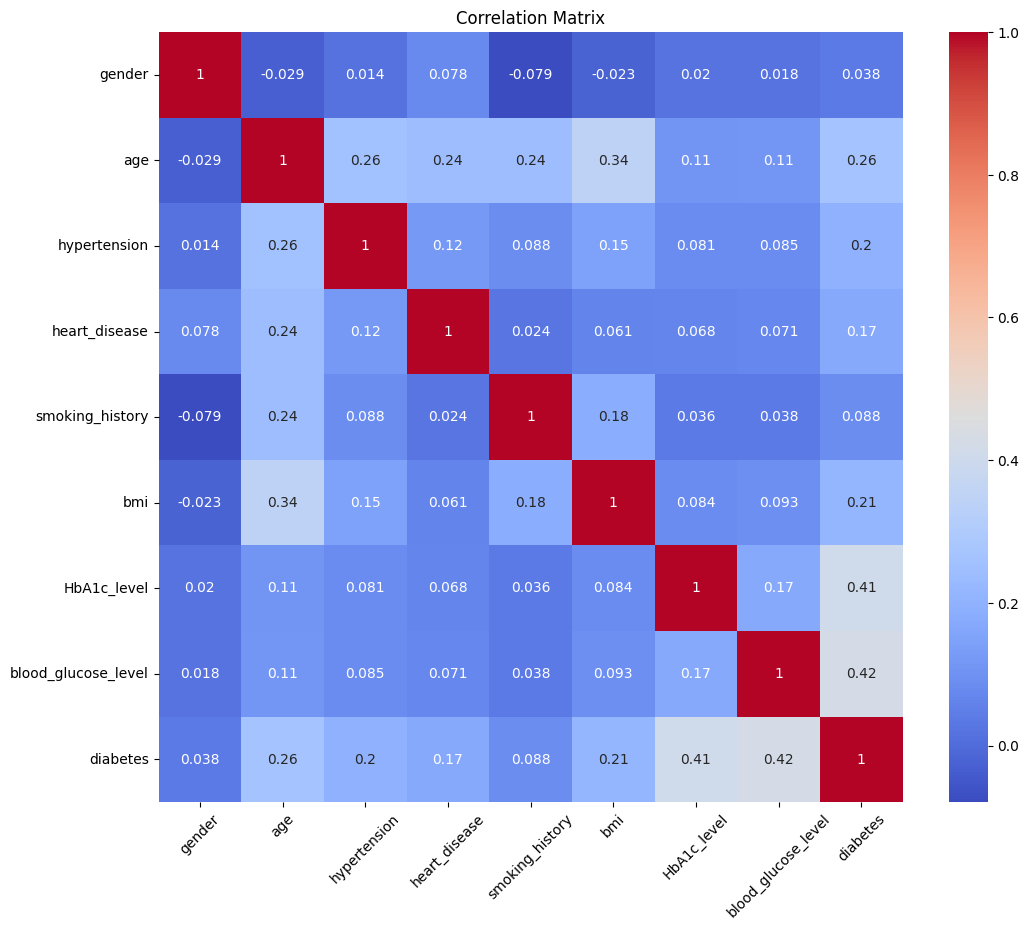

In [46]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.xticks(rotation=45)
plt.title('Correlation Matrix')
plt.show()

In [47]:
threshold = 0.03
correlation_matrix = data.corr()
high_correlation_features = correlation_matrix.index[abs(correlation_matrix['diabetes'])>threshold].tolist()
high_correlation_features.remove('diabetes')
print(high_correlation_features)

X = data[high_correlation_features]
Y = data['diabetes']

['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']


In [48]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state= 55)

In [49]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [50]:
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score, roc_curve, auc,roc_auc_score
y_pred = model.predict(x_test)
print(accuracy_score(y_test ,y_pred))

0.9579303172126885


In [51]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

In [52]:
knn.fit(x_train ,y_train)

KNeighborsClassifier(n_neighbors=3)

In [53]:
y_pred2 =knn.predict(x_test)
print(accuracy_score(y_test ,y_pred2))

0.9502860114404577
